In [1]:
from qiskit import *

In [2]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

In [3]:
# Create circuit
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()

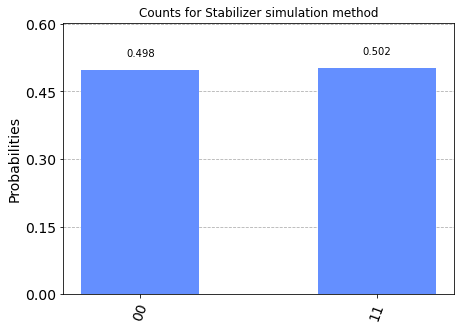

In [4]:
# Increase shots to reduce sampling variance
shots = 10000

# Stabilizer simulation method
sim_stabilizer = Aer.get_backend('aer_simulator_stabilizer')
job_stabilizer = sim_stabilizer.run(circ, shots=shots)
counts_stabilizer = job_stabilizer.result().get_counts(0)
plot_histogram(counts_stabilizer,
               title='Counts for Stabilizer simulation method')

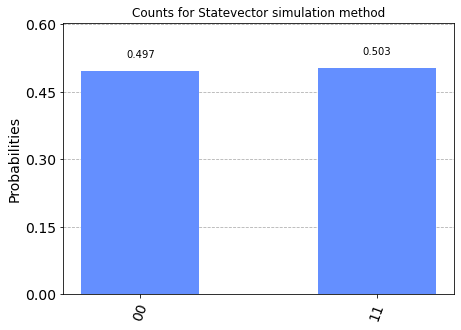

In [5]:
# Statevector simulation method
sim_statevector = Aer.get_backend('aer_simulator_statevector')
job_statevector = sim_statevector.run(circ, shots=shots)
counts_statevector = job_statevector.result().get_counts(0)
plot_histogram(counts_statevector,title='Counts for Statevector simulation method')

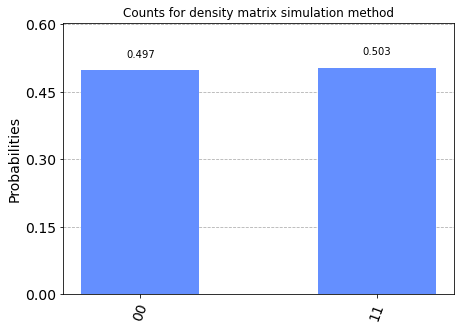

In [6]:
# Density Matrix simulation method
sim_density = Aer.get_backend('aer_simulator_density_matrix')
job_density = sim_density.run(circ, shots=shots)
counts_density = job_density.result().get_counts(0)
plot_histogram(counts_density,title='Counts for density matrix simulation method')

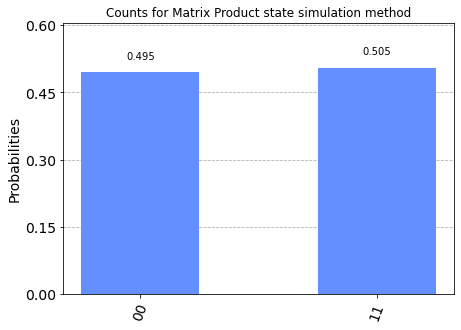

In [7]:
# Matrix Product State simulation method
sim_mps = Aer.get_backend('aer_simulator_matrix_product_state')
job_mps = sim_mps.run(circ, shots=shots)
counts_mps = job_mps.result().get_counts(0)
plot_histogram(counts_mps,title='Counts for Matrix Product state simulation method')

In [8]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [9]:
# Create circuit
my_circuit = QuantumCircuit(2)
my_circuit.h(0)
my_circuit.cx(0, 1)
my_circuit.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [10]:
#Initialize the state to 00
sv=Statevector.from_label('00')

In [11]:
sv

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


In [12]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi

In [13]:
psi = qi.Statevector.from_instruction(my_circuit)
psi.draw('latex', prefix='|\\psi_{int}\\rangle = ')

<IPython.core.display.Latex object>

In [14]:
rho = qi.DensityMatrix.from_instruction(my_circuit)
rho.draw('latex', prefix='\\rho_{int} = ')

<IPython.core.display.Latex object>

In [15]:
print(rho)

DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j]],
              dims=(2, 2))


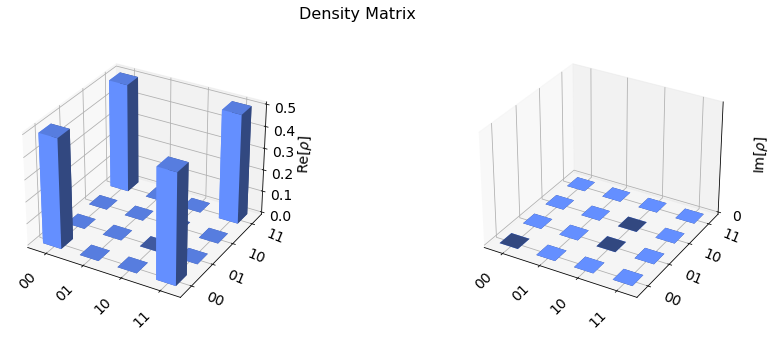

In [16]:
from qiskit.visualization import plot_state_city
plot_state_city(rho.data, title='Density Matrix')

In [17]:
sv=sv.evolve(my_circuit)

In [18]:
sv

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [19]:
sv.data

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

In [20]:
from qiskit.visualization import array_to_latex
array_to_latex(sv.data,'latex',prefix='|\\psi_{fin}\\rangle = ')

<IPython.core.display.Latex object>